In [14]:
%pylab inline

(MainThread) Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Populating the interactive namespace from numpy and matplotlib


/Users/bblais/opt/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['close', 'display', 'e', 'connect']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
from RobotSim373 import *

In [7]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object


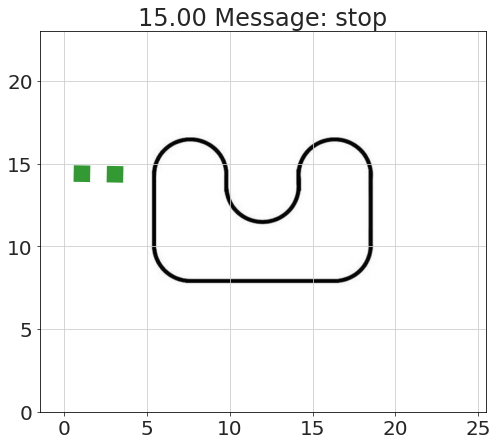

In [13]:
def turn_a_bit(t,robot):
    
    robot.message = 'turn'
    if t<0.9:
        robot['left'].F=-10
        robot['right'].F=10
        return False        # not done yet!
    else:
        return True        #  done with this behavior
    
    
def turn_to_min_distance(t,robot):
    robot.message = 'min distance'
    
    d=robot['left'].read_distance()
    if d<robot.last_distance:
        robot['left'].F=-10
        robot['right'].F=10
        robot.last_distance=d
        return False
    else:
        return True
    
def forward(t,robot):
    robot.message = 'forward'
    robot['left'].F=10
    robot['right'].F=10
    return True
    
def stop(t,robot):
    robot.message = 'stop'
    robot['left'].F=0
    robot['right'].F=0
    
    return True 
    
def wait(dt):
    
    def _wait(t,robot):
        if t<dt:
            return False
        else:
            return True
        
    return _wait
    
    
def monitor(t,robot):
    robot.storage+=t,robot['left'].read_distance()    

def turn_90_degrees(t,robot):
    
    actions=[turn_a_bit,turn_to_min_distance,stop,wait(2),forward,wait(2),stop,wait(2),forward,wait(2),stop]
    
    if t==0.0:  # first time
        robot.current_action=0
        robot.start_time=0.0
        
        
    if robot.current_action>=len(actions):
        return 
    
    action=actions[robot.current_action]
    
    value=action(t-robot.start_time,robot)
    
    if value:  # done with this action
        robot.current_action+=1
        robot.start_time=t
        
    monitor(t,robot)

    
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=15,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.15


In [3]:
def build(robot):    
    
    left=Disk(robot,2,12,radius=1,name='left')


In [16]:
def act(t,robot):
    
    
    force_right=60
    force_down=30

    F=sqrt(force_right**2+force_down**2)

    angle=degrees(arctan2(-force_down,force_right))    
    
    robot['left'].F=F
    robot['left'].F_angle=angle
    

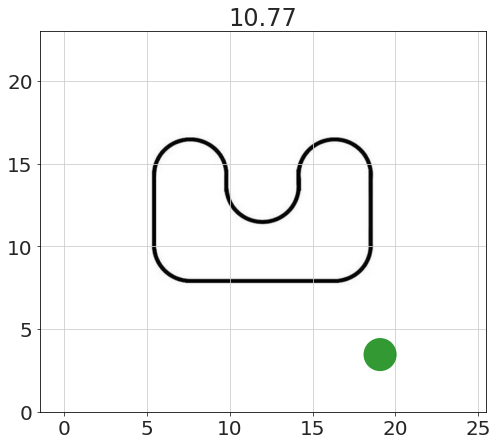

In [17]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()

run_sim(env,act,
        total_time=15,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

In [15]:
force_right=60
force_down=30

F=sqrt(force_right**2+force_down**2)

angle=degrees(arctan2(-force_down,force_right))
print(angle)

-26.56505117707799


In [18]:
-45 % 360

315